In [32]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [34]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [35]:
import os
import pandas as pd

os.getcwd()

'/home/piai/바탕화면/01 실습파일/2. Big Data 분석'

In [36]:
os.chdir('/home/piai/바탕화면/01 실습파일/2. Big Data 분석')

# 7. 주성분 분석 (PCA) - 219 page

In [37]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib ;  import matplotlib.pyplot as plt
# 데이터 시각화:추세, 산점도 행렬 
import seaborn as sns
# Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 주성분 분석
from sklearn.decomposition import PCA
# 회귀분석
import statsmodels.api as sm
# 그래프 표시
%matplotlib inline

In [38]:
df_raw = pd.read_csv("IRIS.csv", encoding = 'euc-kr')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEPAL_LENGTH  150 non-null    float64
 1   SEPAL_WIDTH   150 non-null    float64
 2   PETAL_LENGTH  150 non-null    float64
 3   PETAL_WIDTH   150 non-null    float64
 4   SPECIES       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
print(df_raw.count())

SEPAL_LENGTH    150
SEPAL_WIDTH     150
PETAL_LENGTH    150
PETAL_WIDTH     150
SPECIES         150
dtype: int64


In [41]:
#데이터 분리(Y, Xs) -> 설명변수를 이용한 주성분 분석
df_raw_x = df_raw.drop("SPECIES",axis=1)
df_raw_y = df_raw["SPECIES"]

#LabelEncoder로 라벨 인코딩 (기본은 0,1,2)
le = LabelEncoder()
species_encoded = le.fit_transform(df_raw_y)

#만약 라벨을 1, 2, 3으로 표현하고 싶다면 +1 해줍니다.
species_encoded = species_encoded + 1

#결과를 데이터프레임에 저장하거나 출력합니다.
df_raw["SPECIES"] = species_encoded
df_raw_y.head(),df_raw_x.head()

(0    setosa
 1    setosa
 2    setosa
 3    setosa
 4    setosa
 Name: SPECIES, dtype: object,
    SEPAL_LENGTH  SEPAL_WIDTH  PETAL_LENGTH  PETAL_WIDTH
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2)

In [42]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le = LabelEncoder()

# 범주형 데이터를 정수형으로 변환
df_raw_y = le.fit_transform(df_raw_y)

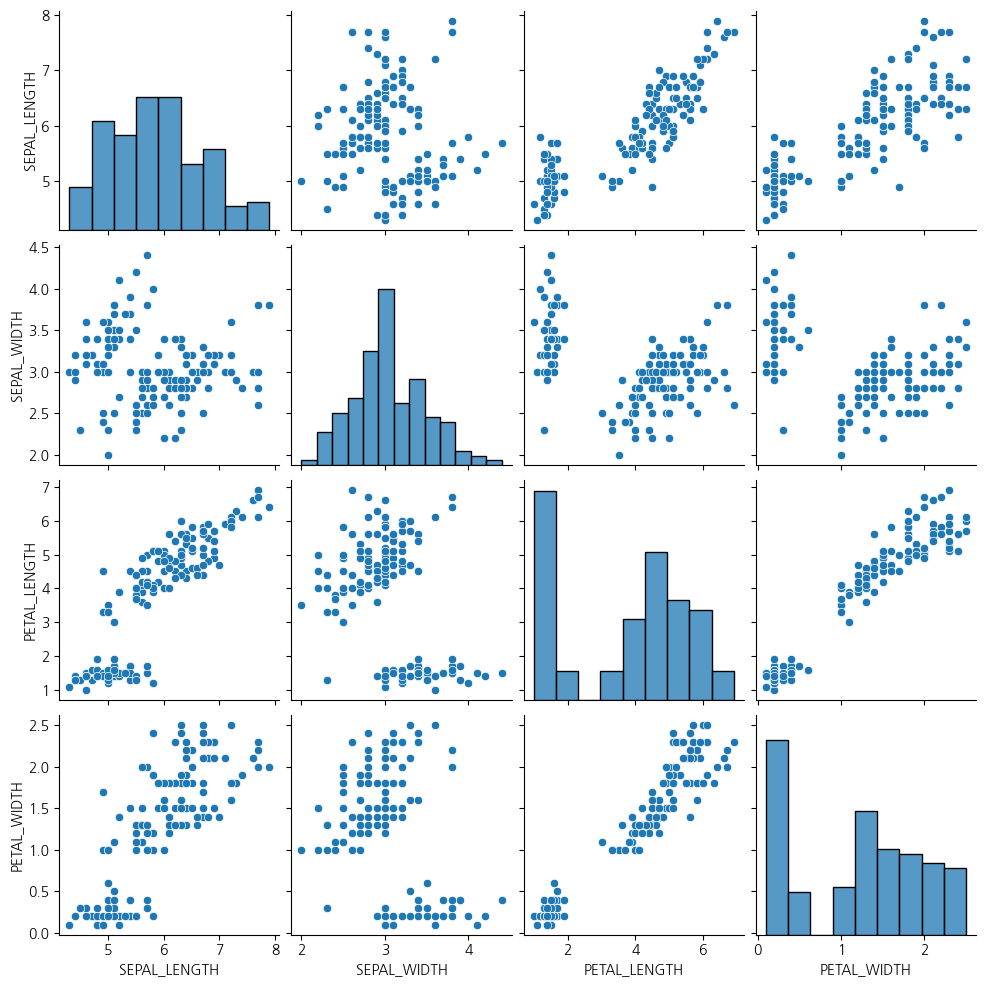

In [43]:
# 산점도 행렬
sns.pairplot(df_raw_x)

In [44]:
# Pearson 상관계수: pearson, kendall, spearman
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


In [45]:
# 요약 통계량 -> Scale 변환 필요 확인
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [46]:
# 변수 이름 저장
x_cols = df_raw_x.columns
# Scale 변환:ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
# 변환된 데이터 및 형태 확인
print("Scaled Data :\n {}".format(nd_scaled[:5].round(3)))
print("Shape :\n {}".format(nd_scaled.shape))

Scaled Data :
 [[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape :
 (150, 4)


In [47]:
# DataFrame으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols ) 
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [48]:
# Scale 변환 데이터 요약 통계량
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


In [49]:
# 주성분 분석:주성분1(Prin1)~주성분4(Prin4) 생성 및 저장
pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_scaled)
# 생성된 주성분 점수 확인
print("PCA Data :\n {}".format(nd_pca[:5]))
# 생성된 주성분 점수 Row, Column 개수 확인
print("Shape :\n {}".format(nd_pca.shape))

PCA Data :
 [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
Shape :
 (150, 4)


In [50]:
# 주성분 점수 저장(Prin1~Prin6, DataFrame형식) 및 확인
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4"])
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


In [51]:
# 주성분 분석 통계량 저장:주성분 번호, Eigenvalue, Eigenvalue ratio 
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range(1,5)]
df_pca_stat["EigenValues"] = pca.explained_variance_ 
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_ 
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


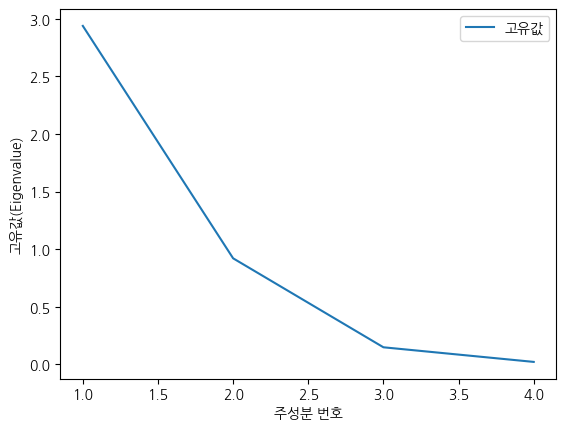

In [52]:
# Scree Plot 
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], 
         label="고유값")
# 그래프 label, legend 설정
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

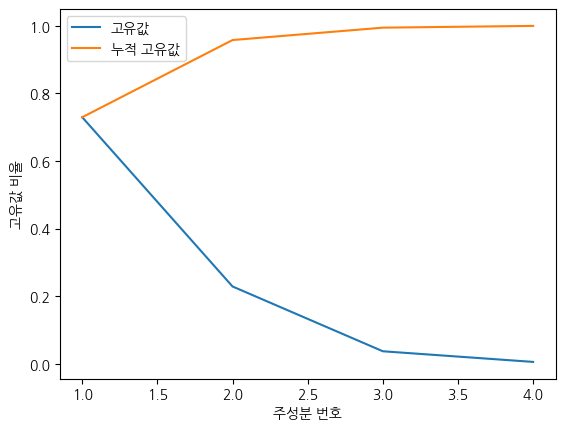

In [53]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], 
         df_pca_stat["EigenValueRatio"], label="고유값")
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], 
         df_pca_stat["CumEigenValueRatio"], label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [54]:
# 주성분 분석 데이터의 변수 이름  
x_cols = pd.DataFrame({"SPECIES":df_raw_x.columns})
# 주성분 Prin1~4까지의 고유벡터 저장
# 전치 결과pd.DataFrame(pca.components_, columns = ["Prin1","Prin2","Prin3","Prin4"])], axis=1)
# 파이썬 PCA 분석 시 SVD 연산 방식의 차이 반영(전치, 부호 변경)
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, \
                            columns = ["Prin1","Prin2","Prin3","Prin4"])], axis=1)
df_eigenvector.round(3)

,SPECIES,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


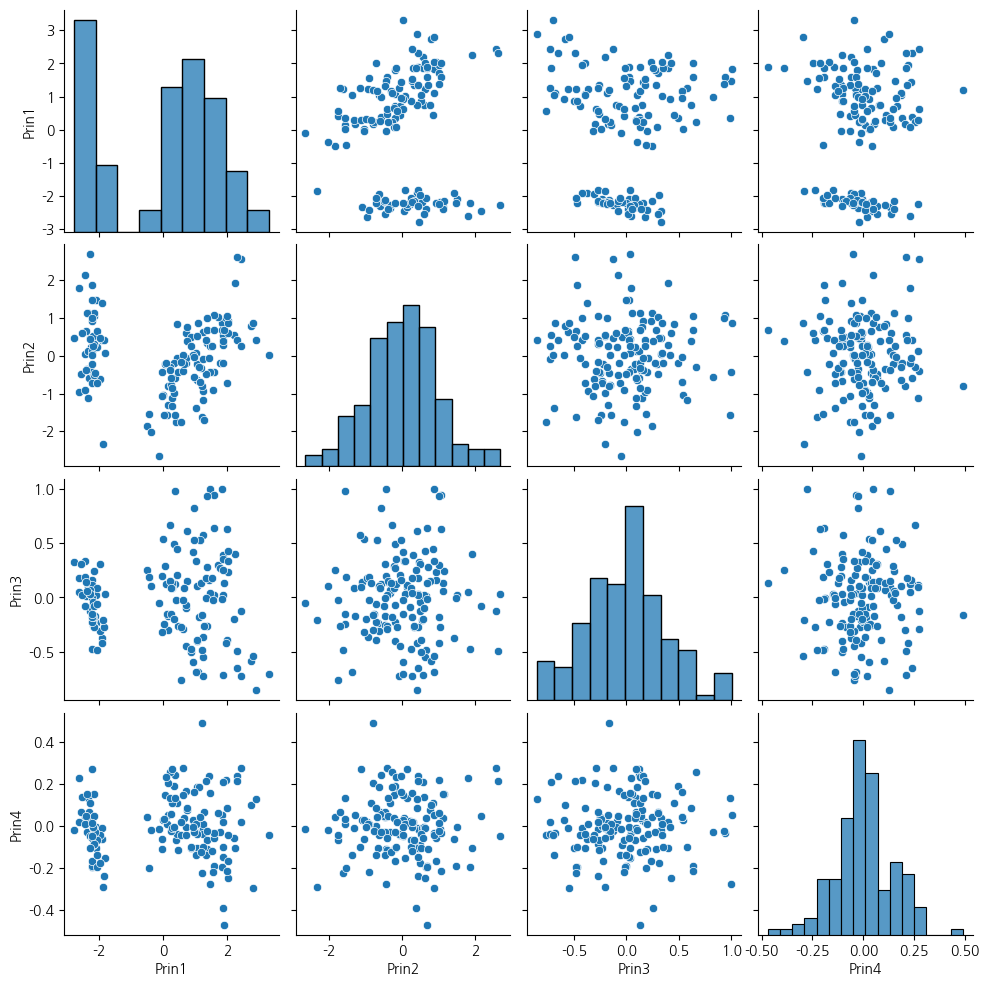

In [55]:
# 산점도 행렬
sns.pairplot(df_pca)

In [56]:
# 상관계수
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,0.0,0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0
Prin3,0.0,-0.0,1.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0


In [57]:
# 다중선형 회귀분석: 원천 데이터 활용
# 원천 데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)
# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           8.46e-83
Time:                        16:07:33   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1865      0.205      0.910   

In [58]:
# 다중선형 회귀분석: Scale 변환 데이터 활용
# Scale 변환 데이터에 절편(const) 컬럼 추가
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           8.46e-83
Time:                        16:07:33   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0000      0.018     55.899   

In [65]:
# 다중선형 주성분 회귀분석: 주성분 점수(score) 데이터 활용
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택
x_var = ["Prin1","Prin3"]

# 선택된 주성분 점수 데이터에 절편(const) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_pca_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     975.5
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.40e-85
Time:                        16:15:26   Log-Likelihood:                 16.939
No. Observations:                 150   AIC:                            -27.88
Df Residuals:                     147   BIC:                            -18.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      0.018     56.097      0.0

# 8. 시계열 분석 - 247page

In [66]:
!pip install pmdarima

In [98]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# 날짜 데이터 생성
from datetime import datetime
# 선형 회귀분석 (절편(intercept) 추가)
import statsmodels.api as sm
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima.model import ARIMA
# auto_arima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [99]:
# 파일명,변수,값 등에 한글 포함시 engine="python" 지정, parse_dates: 날짜 변수 식별
df_raw = pd.read_csv("환율.csv", parse_dates = ["APPL_DATE"])
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


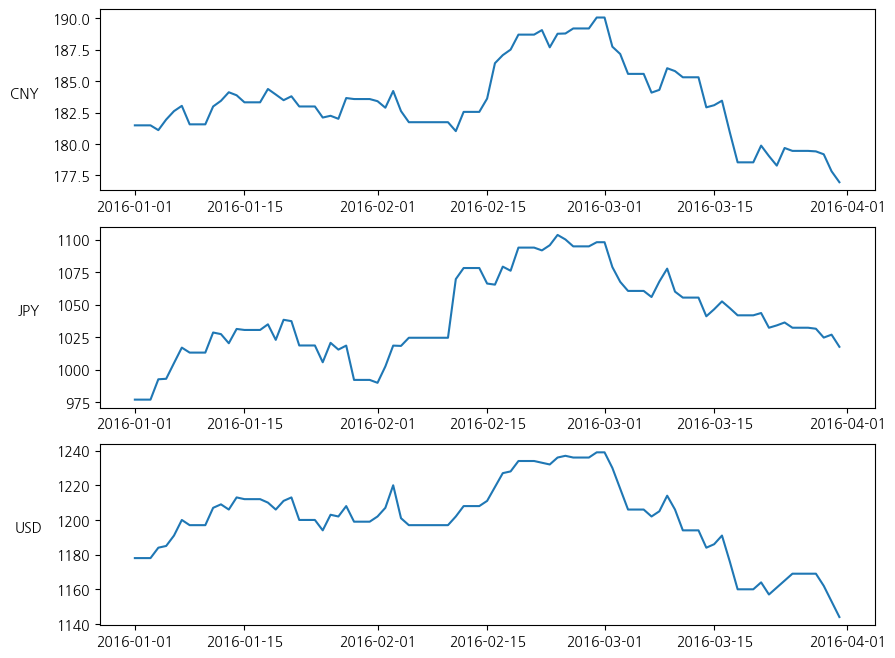

In [100]:
# 중국 위엔화와 엔화/달러 단위 크기가 다르기 때문에 각각 그래프를 생성 : 3행 1열, 크기: (10,8)
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize=(10,8))

# zip 함수를 사용하면 zip 함수 안의 리스트들을 하나씩 출력

# 1번 loop: ax1, 311, "CNY“, # 2번 loop: ax2, 312, "JPY“, # 3번 loop: ax3, 313, "USD"
for (ax, idx, currency) in zip([ax1, ax2, ax3], [311, 312, 313], ["CNY", "JPY", "USD"]):
    
    # plot 추가, 311 -> 3행 1열의 1번 그래프
    ax.plot("APPL_DATE", "STD_RATE", data = df_raw[df_raw["CURRENCY"] == currency])
    
    # y축에 통화 표시 rotation: label 가로로 생성, labelpad: label과 그래프 사이의 거리
    ax.set_ylabel(currency, rotation = 0, labelpad = 20) 

In [101]:
# CNY 데이터 선택 후 APPL_DATE를 index로 설정
# drop method를 이용하여 통화(CURRENCY)와 미달러 환산율(USD_CONV_DATE) 변수 제외
df_CNY = df_raw[df_raw["CURRENCY"] == "CNY"].set_index("APPL_DATE")
df_CNY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

# JPY 데이터 생성
df_JPY = df_raw[df_raw["CURRENCY"] == "JPY"].set_index("APPL_DATE")
df_JPY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

# USD 데이터 생성:실습용 데이터
df_USD = df_raw[df_raw["CURRENCY"] == "USD"].set_index("APPL_DATE")
df_USD.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

df_USD.head()

,STD_RATE
APPL_DATE,
2016-01-01,1178.0
2016-01-02,1178.0
2016-01-03,1178.0
2016-01-04,1184.0
2016-01-05,1185.0


In [102]:
# Train & Test 데이터 분할 : 비율 기준 mask 지정
train_size = 0.9
len_idx = len(df_USD.index)

mask = (np.arange(len_idx) / len_idx) < train_size 
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [103]:
# mask를 이용한 데이터 분할
df_USD_train = df_USD[mask]
df_USD_test = df_USD[~mask]
print("shape of train data: {}".format(df_USD_train.shape))
print("shape of test data: {}".format(df_USD_test.shape))

shape of train data: (82, 1)
shape of test data: (9, 1)


In [104]:
# 추가설명:Train & Test 데이터 분할:index 직접 지정
df_USD_train = df_USD[df_USD.index <= "2016-03-22"]
df_USD_test = df_USD[df_USD.index > "2016-03-22"]
df_USD_test.head()

,STD_RATE
APPL_DATE,
2016-03-23,1161.0
2016-03-24,1165.0
2016-03-25,1169.0
2016-03-26,1169.0
2016-03-27,1169.0


<Axes: xlabel='APPL_DATE'>

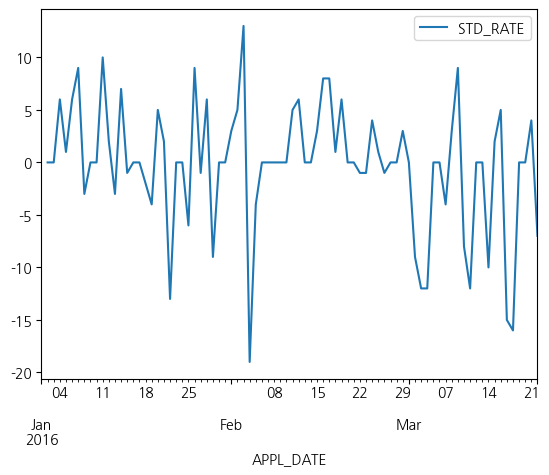

In [105]:
# 1차 차분: z(t) – z(t-1)
# shift(n): 앞의 n번 째 행의 데이터를 가져옴
df_USD_diff1 = df_USD_train - df_USD_train.shift(1)
df_USD_diff1.plot()

<Axes: xlabel='APPL_DATE'>

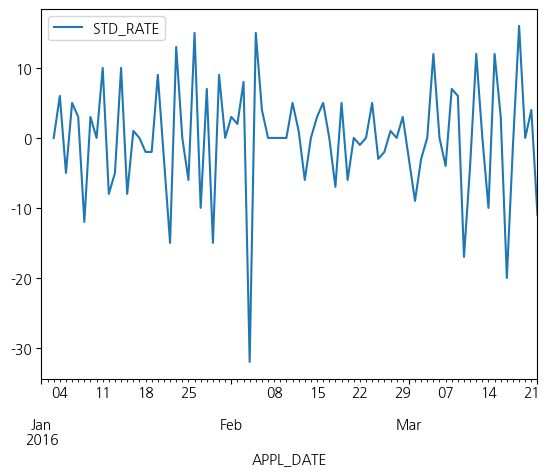

In [106]:
# 2차 차분: (z(t) – z(t-1)) – (z(t-1) - z(t-2)) = z(t) – 2*z(t-1) + z(t-2)
df_USD_diff2 = df_USD_train - 2 * (df_USD_train.shift(1)) + (df_USD_train.shift(2))
df_USD_diff2.plot()

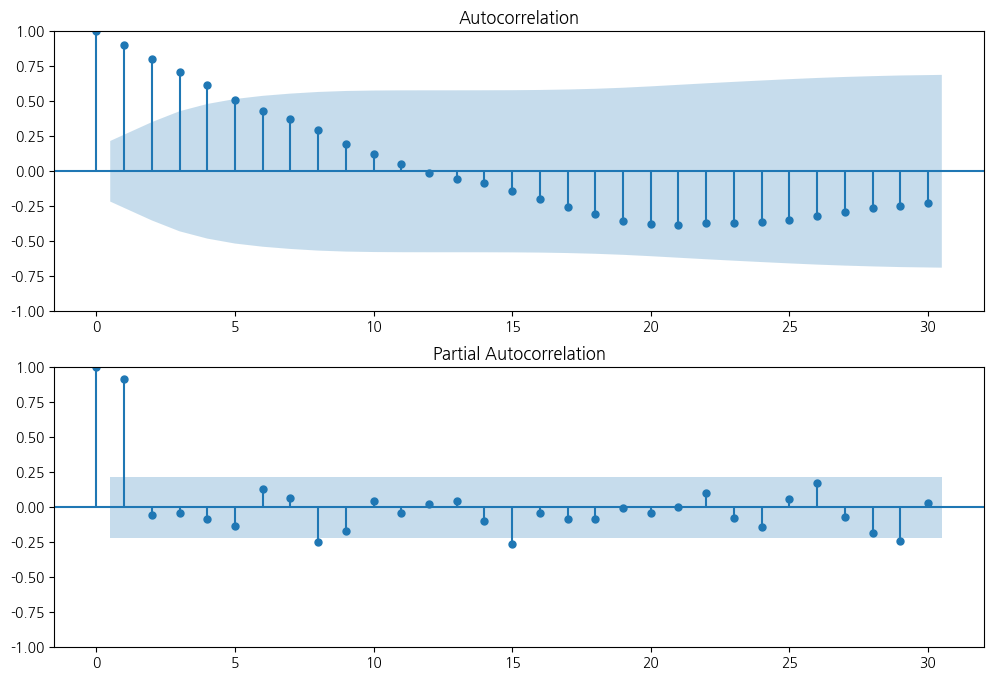

In [107]:
# 자기회귀 최대 p기간 지정
lag_size = 30
fig = plt.figure(figsize=(12,8))
# acf 그래프를 그릴 공간 생성
ax1 = fig.add_subplot(211)
# 자기상관 함수 그래프 plot_acf 함수 사용 
fig = plot_acf(df_USD_train["STD_RATE"], lags=lag_size, ax=ax1) # ["STD_RATE"] 생략 가능
# pacf 그래프를 그릴 공간 생성
ax2 = fig.add_subplot(212)
# 부분 자기상관 함수 그래프 plot_pacf 함수 사용 
fig = plot_pacf(df_USD_train["STD_RATE"], lags=lag_size, ax=ax2) # ["STD_RATE"] 생략 가능

In [108]:
# Train 데이터 이용, AR(1), I(2, 차분), MA(0)인 ARIMA 모델
ts_model_USD = ARIMA(df_USD_train, order = (1, 2, 0))  # (p,d,q) 지정

# 데이터 적합
ts_result_USD = ts_model_USD.fit()
print(ts_result_USD.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -274.804
Date:                Wed, 19 Mar 2025   AIC                            553.608
Time:                        16:35:08   BIC                            558.372
Sample:                    01-01-2016   HQIC                           555.518
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3764      0.124     -3.047      0.002      -0.618      -0.134
sigma2        56.2767      7.107      7.919      0.000      42.348      70.206
Ljung-Box (L1) (Q):                   2.21   Jarque-

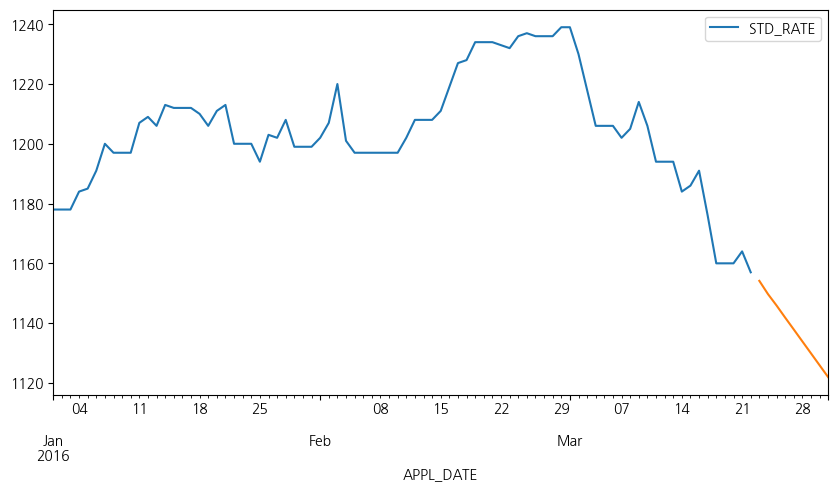

In [109]:
# 예측 시작/종료 날짜 지정
start_time = df_USD_test.index.min() # 2016-03-23
end_time = df_USD_test.index.max() # 2016-03-31
fig, ax = plt.subplots(figsize = (10, 5))

# 예측 전까지 데이터
ax = df_USD_train.plot(ax = ax)
# 예측 그래프 생성 함수, start: 예측 시작, end: 예측 종료, plot_insample: 가지고 있는 데이터 중 예측 구간과 겹치는 구간 표시
fig = ts_result_USD.predict(start=start_time, end=end_time, ax = ax, plot_insample=False).plot()

In [110]:
# 전체 기간의 실제값, 예측값 확인 
start_time = pd.to_datetime("2016-01-03")  # 차분=2 -> 시작일자 + 2 이후부터 예측값 생성됨
y_pred = ts_result_USD.predict(start=start_time, end=end_time, typ= 'levels')

df_merge = df_USD  # 실제값 저장
df_merge["예측값"]=y_pred  # 예측값 저장 및 변수명 지정
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178.0,NaN
2016-01-02,1178.0,NaN
2016-01-03,1178.0,1178.029066
2016-01-04,1184.0,1178.000000
2016-01-05,1185.0,1187.741796


<Axes: xlabel='APPL_DATE'>

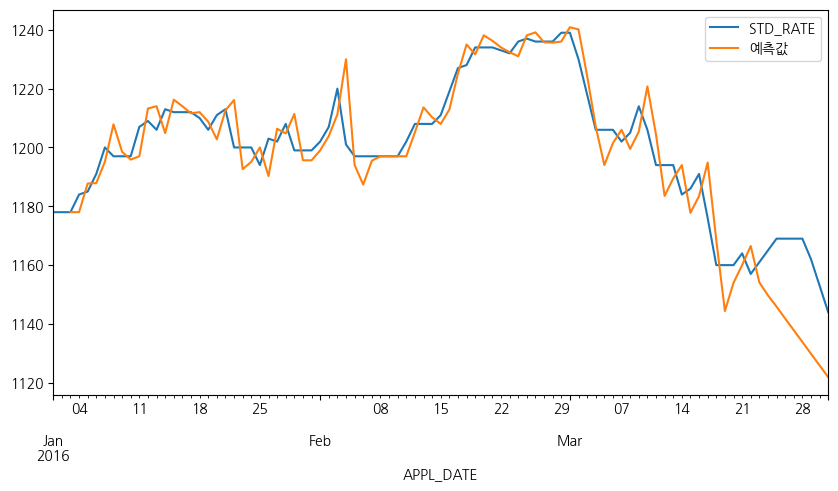

In [111]:
# 추세 그래프 생성 및 확인
df_merge.plot( y=["STD_RATE","예측값"], figsize=(10,5))

In [112]:
# 최적의 모수(p,q) 찾기 위한 auto_arima 적용 
ts_model = auto_arima(df_USD_train, max_p=3, max_q=3, d=2, 
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=524.467, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=563.701, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=553.608, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=521.789, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.560, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=523.412, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=524.524, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.565 seconds


In [113]:
# Train 데이터 이용, AR(0), I(2, 차분), MA(1)인 ARIMA 모델
ts_model_USD = ARIMA(df_USD_train, order = (0, 2, 1))  # (p,d,q) 지정

# 데이터 적합
ts_result_USD = ts_model_USD.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -258.895
Date:                Wed, 19 Mar 2025   AIC                            521.789
Time:                        16:35:09   BIC                            526.553
Sample:                    01-01-2016   HQIC                           523.699
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9220      0.053    -17.368      0.000      -1.026      -0.818
sigma2        36.9957      4.740      7.805      0.000      27.705      46.286
Ljung-Box (L1) (Q):                   0.06   Jarque-

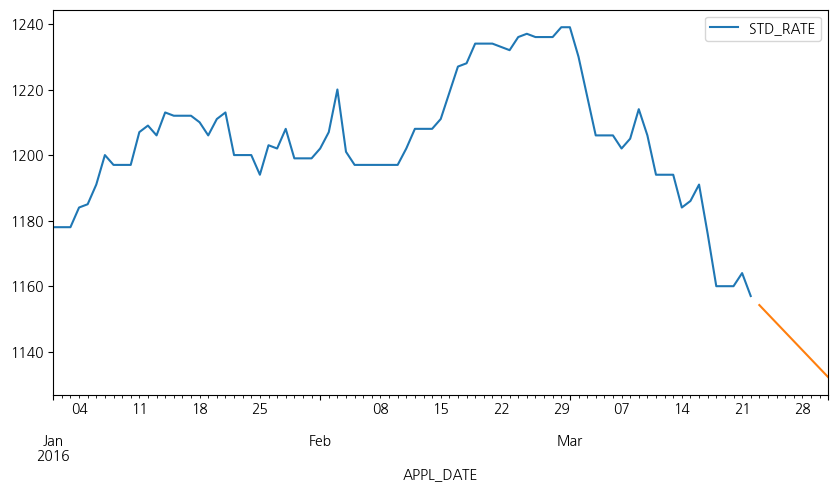

In [114]:
# 예측 시작/종료 날짜 지정
start_time = df_USD_test.index.min() # 2016-03-23
end_time = df_USD_test.index.max() # 2016-03-31
fig, ax = plt.subplots(figsize = (10, 5))

# 예측 전까지 데이터
ax = df_USD_train.plot(ax = ax)

# 예측 그래프 생성 함수, start: 예측 시작, end: 예측 종료, plot_insample: 가지고 있는 데이터 중 예측 구간과 겹치는 구간 표시
fig = ts_result_USD.predict(start=start_time, end=end_time, ax = ax, plot_insample=False).plot()


In [115]:
# 전체 기간의 실제값, 예측값 확인 
start_time = pd.to_datetime("2016-01-03")  # 차분=2 -> 시작일자 + 2 이후부터 예측값 생성됨
y_pred = ts_result_cny.predict(start=start_time, end=end_time, typ= 'levels')
df_merge = df_USD  # 실제값 저장
df_merge["예측값"]=y_pred  # 예측값 저장 및 변수명 지정
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178.0,NaN
2016-01-02,1178.0,NaN
2016-01-03,1178.0,1178.040179
2016-01-04,1184.0,1178.020024
2016-01-05,1185.0,1186.035078


<Axes: xlabel='APPL_DATE'>

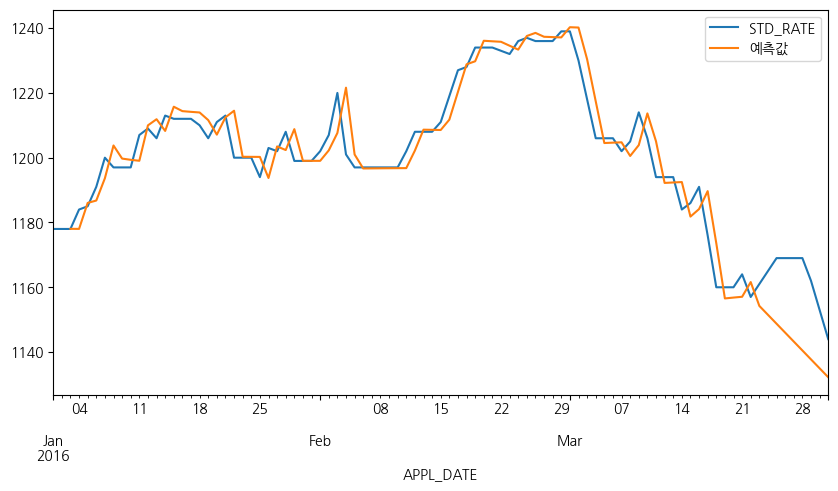

In [116]:
# 추세 그래프 생성 및 확인
df_merge.plot( y=["STD_RATE","예측값"], figsize=(10, 5))